# Análise de RFM para e-commerce

Uma empresa do ramo de e-commerce solicitou uma análise dos indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.
<br>

A saber, RFM:

*   R (Recency): Tempo que o cliente realizou a última compra (em dias)
*   F (Frequency): Quantidade de compras realizadas pelo cliente
*   M (Monetary): Valor do ticket médio gasto pelo cliente

onde, ticket médio = média do total gasto por pedido para cada cliente.
<br>

## Importar e carregar as bibliotecas

In [ ]:
%%capture
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [ ]:
# importar bibliotecas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import datetime
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
import datetime

from sklearn.preprocessing import scale

In [ ]:
# importar dataset

from google.colab import files
# uploaded = files.upload()

##  Carregamento do banco de dados

In [ ]:
# carregar dataset

DATA = pd.read_csv('../data/data.csv', encoding='latin1')
dataset = DATA
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## Análise Exploratória de Dados (EDA)


In [ ]:
dataset.sort_values(by=['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
40984,539750,22652,TRAVEL SEWING KIT,1,12/21/2010 15:40,0.00,NaN,United Kingdom
52217,540696,84562A,NaN,1,1/11/2011 9:14,0.00,NaN,United Kingdom
52262,540699,POST,NaN,1000,1/11/2011 9:32,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:49,13541.33,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom


Existem valores negativos para UniPrice.

In [ ]:
# observar características do dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Observações:** Desvio padrão maior que a média, revelando uma alta dispersão de dados.
Porém, há valores *negativos* no mínimo, o que precisa ser observado com cautela.

In [ ]:
dataset.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
dataset.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Data Cleaning e Wrangling

### Remoção de valores nulos

Para indicar que estou mudando o dataset original, a partir do tratamento abaixo o conjunto de dados vai se chamar df (e variações).

In [ ]:
# remover valores nulos e sobrescrever o nome do dataset
df = dataset.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Observação:** Após remover os valores nulos, a coluna de UnitPrice apresenta valor mínimo igual a 0.

### Filtros

In [ ]:
# filtro para verificar se existem dados nulos ou menor que zero na coluna de preços

NaN_df = df['UnitPrice'].isnull()
NaN_df.sum()



0

In [ ]:
# filtro para verificar se existem dados nulos ou menor que zero na coluna de preços

Zero_df = df.query('UnitPrice < 0')
print(Zero_df)



Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [ ]:
df[(df['UnitPrice']>0)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# filtro para verificar se existem dados nulos ou menor que zero na coluna de preços com a função query
filtered_df = df.isnull().query('UnitPrice < 0').count()

filtered_df

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# filtro apenas para conter preços acima de zero

df_pricePos = df.query('UnitPrice > 0')

# df_positivo = df.query('UnitPrice >= 1')

In [ ]:
# filtro para verificar se existem dados nulos ou menor que zero na coluna de quantidade

df_null = df['Quantity'].isnull().sum()
df_null


0

In [ ]:
# filtro para verificar se existem dados nulos ou menor que zero na coluna de quantidade

df_qtd_null = df[['Quantity']].query('Quantity < 0.0').count()
df_qtd_null

Quantity    8905
dtype: int64

In [ ]:
# filtro apenas para conter quantidade acima de zero

df_qtdPos = df.query('Quantity > 0')
df_qtdPos.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
# dataframe com filtro para UniPrice e Quantity (remoção de valores nulos, negativos e == 0)

df_filtered = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]
df_filtered.info()
df_filtered.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
df_filtered.sort_values(by='UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,7/26/2011 10:13,0.001,15618.0,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,4/15/2011 9:27,0.001,13952.0,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,9/26/2011 17:01,0.001,13405.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/2011 14:58,0.001,16198.0,United Kingdom
407634,571904,16045,POPART WOODEN PENCILS ASST,100,10/19/2011 14:41,0.040,12522.0,Germany
...,...,...,...,...,...,...,...,...
374542,569382,M,Manual,1,10/3/2011 16:44,3155.950,15502.0,United Kingdom
406406,571751,M,Manual,1,10/19/2011 11:18,3949.320,12744.0,Singapore
422376,573080,M,Manual,1,10/27/2011 14:20,4161.060,12536.0,France
422351,573077,M,Manual,1,10/27/2011 14:13,4161.060,12536.0,France


### Duplicados

In [ ]:
# linhas duplicadas com a função duplicated

df_filtered.duplicated().sum()

5192

In [ ]:
# identificar valores duplicados com a função duplicated
df_filtered.duplicated(keep=False).sum()


10001

In [ ]:
df_filtered[df_filtered.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# drop para as linhas duplicadas

df_duplicated = df_filtered.drop_duplicates()
df_duplicated




,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Correção de tipos de dados

Coluna - Tipo esperado
* InvoiceNo - object / str
* StockCode - object / str
* Description - object / str
* Quantity - int
* InvoiceDate - datetime
* UnitPrice - float
* CustomerID - int
* Country - object / str



In [ ]:
# alterar tipo de dado do CustomerID
df_types = df_duplicated
df_types['CustomerID'] = df_types['CustomerID'].astype('int64')

In [ ]:
# alterar tipo de dado da InvoiceDate - remover horas

df_types['InvoiceDate'] = df_types['InvoiceDate'].str.replace(' \d\d:\d\d', '', regex=True)
df_types['InvoiceDate'] = df_types['InvoiceDate'].str.replace(' \d:\d\d', '', regex=True)

In [ ]:
# alterar data pelo numpy
df_types['InvoiceDate'] = df_types['InvoiceDate'].astype(np.datetime64)


In [ ]:
# alterar data pelo pandas

df_types['InvoiceDate'] = pd.to_datetime(df_types['InvoiceDate'], format='%d/%m/%Y')

In [ ]:
df_types

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [ ]:
df_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


### Tratar outliers

Vamos considerar estes valores como erro. Visualize os outliers e remova os outliers extremos em que a quantidade do item na compra é superior a 10.000, e o preço unitário é maior que 5.000.

<ipython-input-31-4c75c9108987>:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



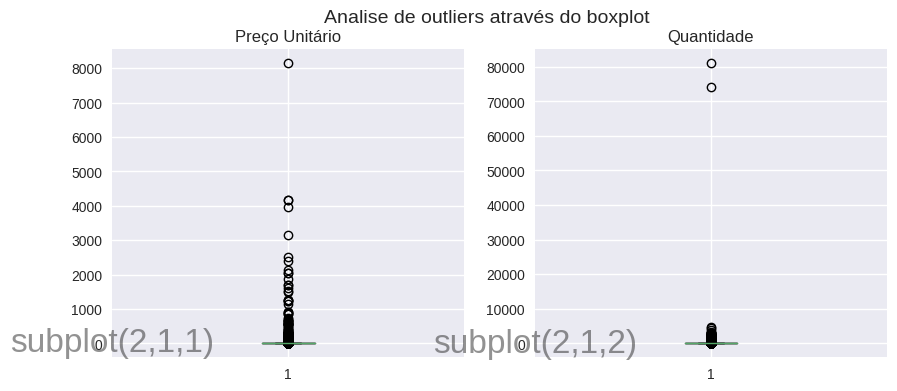

In [ ]:
# visualizar os outliers com boxplot
df_outlier = df_types

plt.style.use("seaborn")
plt.figure(figsize = ((10, 4)))

plt.subplot(1, 2, 1)
plt.title("Preço Unitário", fontsize = 12)
plt.text(0.5, 0.5, 'subplot(2,1,1)', ha='center', va='center',
size=24, alpha=.5)
plt.boxplot(x=df_outlier["UnitPrice"])

plt.subplot(1, 2, 2)
plt.text(0.5, 0.5, 'subplot(2,1,2)', ha='center', va='center',
size=24, alpha=.5)
plt.title("Quantidade", fontsize = 12)
plt.boxplot(x=df_outlier["Quantity"])

plt.suptitle("Analise de outliers através do boxplot", fontsize = 14)

plt.show()

<Axes: >

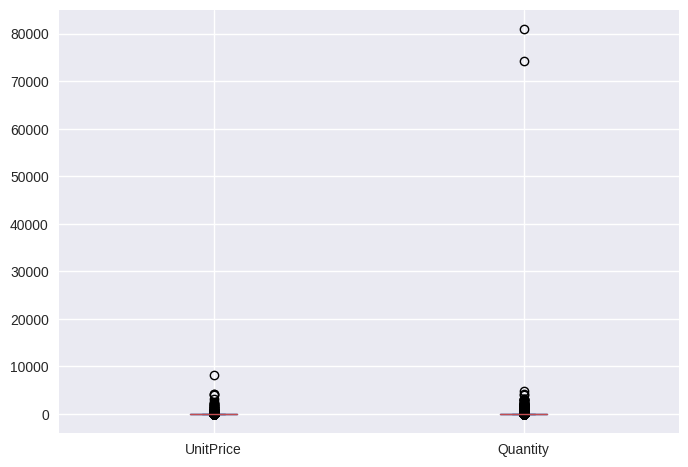

In [ ]:
df_outlier[['UnitPrice', 'Quantity']].plot.box()

In [ ]:
px.box( x=df_outlier["UnitPrice"])


In [ ]:
px.box( x=df_outlier["Quantity"])

<Axes: >

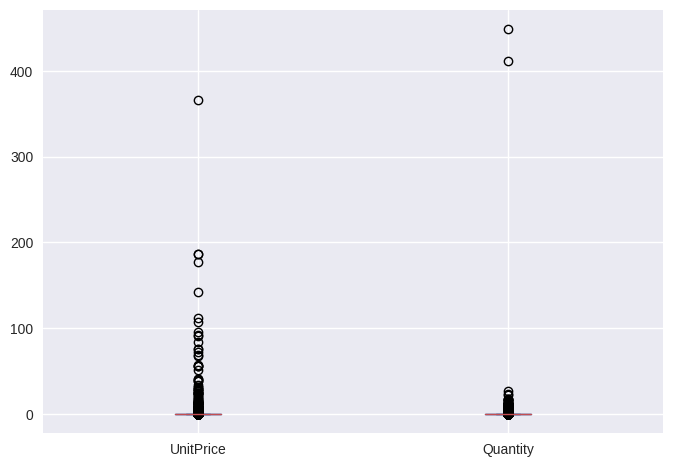

In [ ]:
# boxplot com dados padronizados

df_outlier[['UnitPrice', 'Quantity']].apply(scale).plot.box()

In [ ]:
def is_outlier (array, extreme = False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor * iqr
  lower_outlier = q1 - factor * iqr
  return (array < lower_outlier)|(array > upper_outlier)

In [ ]:
df_outlier[['Quantity', 'UnitPrice']].apply(is_outlier)

,Quantity,UnitPrice
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
541904,False,False
541905,False,False
541906,False,False
541907,False,False


In [ ]:
# identificar a quantidade de outliers na coluna UnitPrice

is_outlier(df_outlier.UnitPrice).sum()

34112

In [ ]:
# identificar a quantidade de outliers na coluna Quantity

is_outlier(df_outlier.Quantity).sum()

25616

In [ ]:
#Este filtro mostra apenas os outliers:
df_outlier[df_outlier[['Quantity', 'UnitPrice']].apply(is_outlier).any(axis=1)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047,United Kingdom
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01,9.95,13047,United Kingdom
19,536367,21777,RECIPE BOX WITH METAL HEART,4,2010-12-01,7.95,13047,United Kingdom
20,536367,48187,DOORMAT NEW ENGLAND,4,2010-12-01,7.95,13047,United Kingdom
...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09,1.45,13777,United Kingdom
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09,1.85,13777,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09,0.72,13777,United Kingdom
541868,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,2011-12-09,1.85,13777,United Kingdom


In [ ]:
# Filtro com a negação da expressão, ou seja, o dataframe sem os outliers:
df_sem_outliers_apply = df_outlier[~df_outlier[['Quantity', 'UnitPrice']].apply(is_outlier).any(axis=1)]
df_sem_outliers_apply.describe()

,Quantity,UnitPrice,CustomerID
count,333234.000000,333234.000000,333234.000000
mean,7.550682,2.194218,15318.903614
std,6.777237,1.546015,1711.175915
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13988.000000
50%,6.000000,1.650000,15235.000000
75%,12.000000,2.950000,16814.000000
max,27.000000,7.500000,18287.000000


<Axes: >

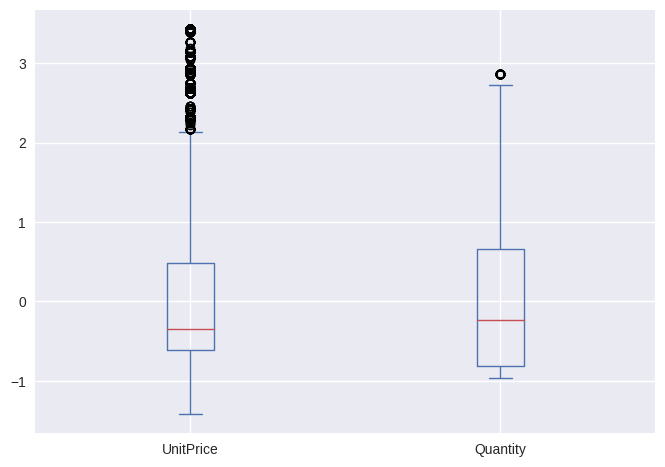

In [ ]:
df_sem_outliers_apply[['UnitPrice', 'Quantity']].apply(scale).plot.box()

In [ ]:
# remoção dos outliers: quantidade do item > 10.000 e preço unitário > 5.000

# df_sem_outliers[(df_sem_outliers['UnitPrice'] <= 5000) & (df['Quantity'] <= 10000)].sort_values(by=['Quantity'], ascending=False)

df_sem_outliers_final = df_outlier[(df_outlier['UnitPrice'] <= 5000) & (df['Quantity'] <= 10000)]
df_sem_outliers_final.describe()


<ipython-input-38-1f570e035a29>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Quantity,UnitPrice,CustomerID
count,392689.000000,392689.000000,392689.000000
mean,12.724550,3.105194,15287.846520
std,43.083696,18.055047,1713.538259
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,4800.000000,4161.060000,18287.000000


<Axes: >

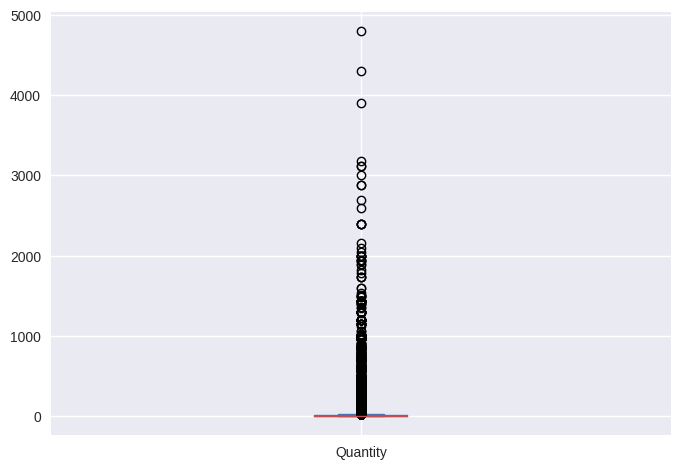

In [ ]:
df_sem_outliers_final[['Quantity']].plot.box()

<Axes: >

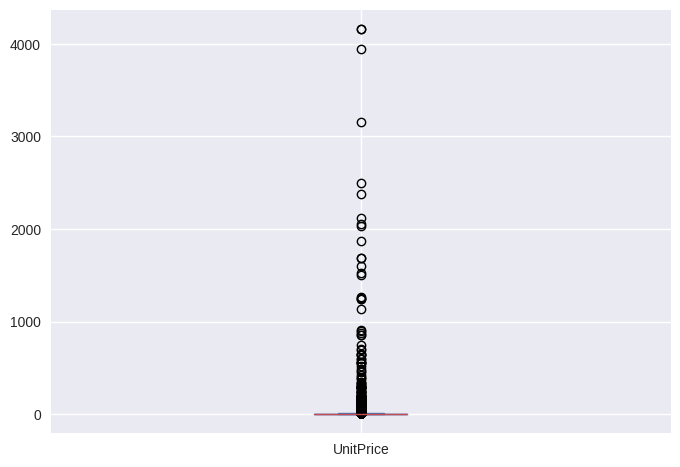

In [ ]:
df_sem_outliers_final[['UnitPrice']].plot.box()

### Coluna adicional no dataset

In [ ]:
# coluna adicional com o preço total da compra a partir das colunas Quantity e UnitPrice

df_sem_outliers_final['TotalPrice'] = df_sem_outliers_final['Quantity'] * df_sem_outliers_final['UnitPrice']
df_sem_outliers_final.info()
df_sem_outliers_final.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392689 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392689 non-null  object        
 1   StockCode    392689 non-null  object        
 2   Description  392689 non-null  object        
 3   Quantity     392689 non-null  int64         
 4   InvoiceDate  392689 non-null  datetime64[ns]
 5   UnitPrice    392689 non-null  float64       
 6   CustomerID   392689 non-null  int64         
 7   Country      392689 non-null  object        
 8   TotalPrice   392689 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


,Quantity,UnitPrice,CustomerID,TotalPrice
count,392689.000000,392689.000000,392689.000000,392689.000000
mean,12.724550,3.105194,15287.846520,21.985370
std,43.083696,18.055047,1713.538259,95.899104
min,1.000000,0.001000,12347.000000,0.001000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.450000
75%,12.000000,3.750000,16791.000000,19.800000
max,4800.000000,4161.060000,18287.000000,38970.000000


In [ ]:
df_sem_outliers_final


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,16.60


<Axes: >

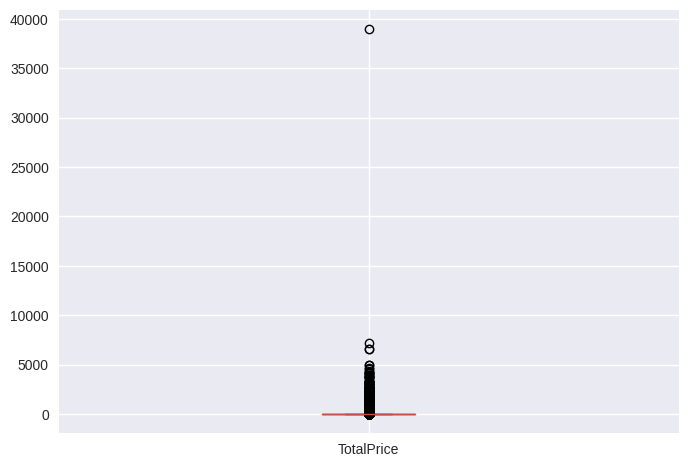

In [ ]:
df_sem_outliers_final[['TotalPrice']].plot.box()

### Última data

Calcule a data da última compra no dataset como um todo, pois vamos utilizar este valor como data de comparação para cálculo da recência.

In [ ]:
# cálculo da data da última compra no dataset como um todo com a função max()

new_df = df_sem_outliers_final

new_df['InvoiceDate'].agg(['min', 'max', 'median'])

min      2010-12-01
max      2011-12-09
median   2011-07-31
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
new_df.sort_values(by='InvoiceDate', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680,France,14.85
541212,581494,22549,PICTURE DOMINOES,12,2011-12-09,1.45,12518,Germany,17.40
541219,581495,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-12-09,2.95,14051,United Kingdom,35.40
541218,581495,22699,ROSES REGENCY TEACUP AND SAUCER,12,2011-12-09,2.95,14051,United Kingdom,35.40
541217,581495,23535,WALL ART BICYCLE SAFETY,12,2011-12-09,5.95,14051,United Kingdom,71.40
...,...,...,...,...,...,...,...,...,...
1317,536534,22865,HAND WARMER OWL DESIGN,12,2010-12-01,2.10,15350,United Kingdom,25.20
1318,536534,22867,HAND WARMER BIRD DESIGN,12,2010-12-01,2.10,15350,United Kingdom,25.20
1319,536534,22112,CHOCOLATE HOT WATER BOTTLE,3,2010-12-01,4.95,15350,United Kingdom,14.85
1320,536535,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,2010-12-01,4.95,15605,United Kingdom,14.85


### Gráficos

* Top 10 países com maior valor em vendas
* Top 10 produtos mais vendidos
* Valor de venda total por mês
* Valor de venda total por mês e por país (considere apenas os top 10)


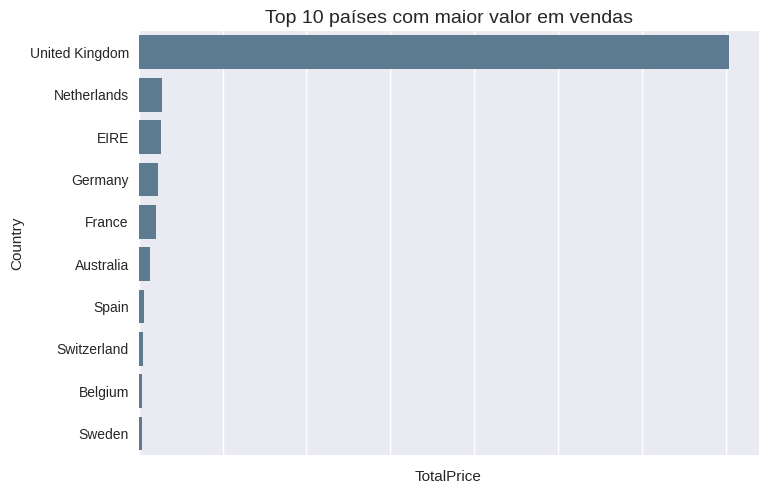

In [ ]:
# Top 10 países com maior valor em vendas (gráfico de barras com Country vs TotalPrice)

top_country = new_df.sort_values(['TotalPrice'], ascending=False).reset_index(drop=True)

top_country = new_df.groupby('Country', as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False).head(10)
sns.barplot(data=top_country, x='TotalPrice', y='Country', color='#547C99', dodge=False).set(xticklabels=[]);
plt.title('Top 10 países com maior valor em vendas', loc='center', fontsize=14);

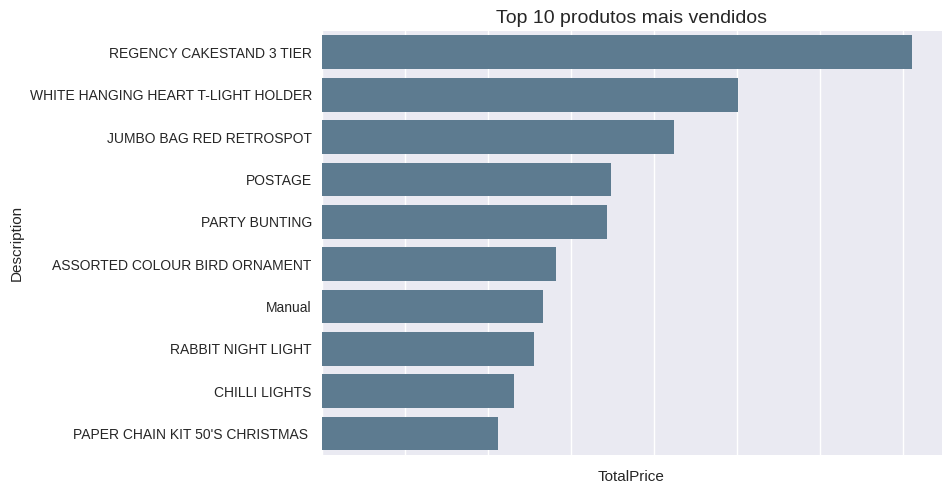

In [ ]:
# Top 10 produtos mais vendidos (StockCode)

top_products = new_df.sort_values(['TotalPrice'], ascending=False).reset_index(drop=True)

top_products = new_df.groupby('Description', as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False).head(10)
sns.barplot(data=top_products, x='TotalPrice', y='Description', color='#547C99', dodge=False).set(xticklabels=[]);
plt.title('Top 10 produtos mais vendidos', loc='center', fontsize=14);

In [ ]:
# Extrair o mês da coluna InvoiceDate
new_df['Month'] = new_df['InvoiceDate'].dt.strftime('%m')
new_df['Year-Month'] = new_df['InvoiceDate'].dt.strftime('%Y-%m')
new_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 392689 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392689 non-null  object        
 1   StockCode    392689 non-null  object        
 2   Description  392689 non-null  object        
 3   Quantity     392689 non-null  int64         
 4   InvoiceDate  392689 non-null  datetime64[ns]
 5   UnitPrice    392689 non-null  float64       
 6   CustomerID   392689 non-null  int64         
 7   Country      392689 non-null  object        
 8   TotalPrice   392689 non-null  float64       
 9   Month        392689 non-null  object        
 10  Year-Month   392689 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 36.0+ MB


In [ ]:
# Converter tipo do dado

#new_df['Month'] = new_df['Month'].astype('int64')
new_df['Year-Month'] = new_df['Year-Month'].astype('datetime64[ns]')

new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392689 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392689 non-null  object        
 1   StockCode    392689 non-null  object        
 2   Description  392689 non-null  object        
 3   Quantity     392689 non-null  int64         
 4   InvoiceDate  392689 non-null  datetime64[ns]
 5   UnitPrice    392689 non-null  float64       
 6   CustomerID   392689 non-null  int64         
 7   Country      392689 non-null  object        
 8   TotalPrice   392689 non-null  float64       
 9   Month        392689 non-null  object        
 10  Year-Month   392689 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 36.0+ MB


In [ ]:
# Adicionando data como Index

df_index = new_df.set_index('InvoiceDate').sort_index()



In [ ]:
# resample

df_venda_mes = df_index.resample('M').sum()
df_venda_mes

<ipython-input-50-af3358ffe23b>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Quantity,UnitPrice,CustomerID,TotalPrice
InvoiceDate,,,,
2010-12-31,311048,80679.600,398371675,570422.730
2011-01-31,274258,66233.610,318054973,490917.710
2011-02-28,265027,62619.480,301727994,446084.920
2011-03-31,347582,87864.790,407858866,594081.760
2011-04-30,291366,78543.481,342666568,468374.331
2011-05-31,372863,93358.160,427247786,669212.400
2011-06-30,363014,84602.660,412518212,660046.050
2011-07-31,367360,75454.521,406784607,598962.901
2011-08-31,397373,78877.090,408614424,644051.040


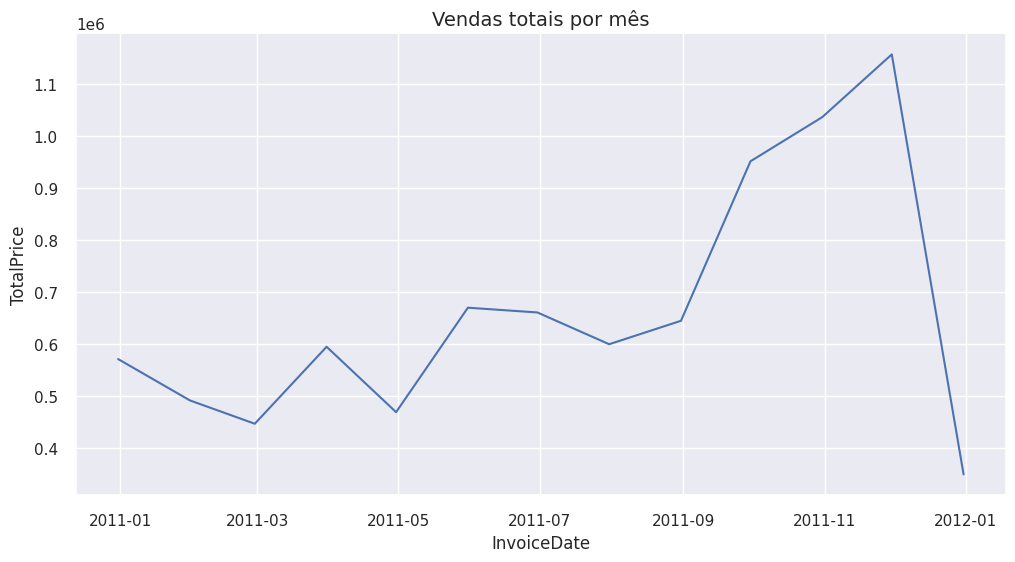

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})
plt.title('Vendas totais por mês', loc='center', fontsize=14);

sns.lineplot(x = 'InvoiceDate', y = "TotalPrice", data = df_venda_mes, err_style=None)
plt.show()

In [ ]:
new_df['Date'] = new_df['InvoiceDate'].dt.to_period('M')
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Year-Month,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,12,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,12,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,12,2010-12-01,2010-12


In [ ]:
new_df.groupby('Country').sum().sort_values(by='TotalPrice', ascending=False).head(10)

<ipython-input-52-51abb200c171>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Quantity,UnitPrice,CustomerID,TotalPrice
Country,,,,
United Kingdom,4086094,1029799.994,5429497605,7031228.694
Netherlands,200361,6247.730,34020369,285446.340
EIRE,140133,32134.960,106549566,265262.460
Germany,119154,33499.580,114153863,228678.400
France,111428,36788.980,105556274,208934.310
Australia,83891,3605.750,14708836,138453.810
Spain,27933,9492.390,32005204,61558.560
Switzerland,30082,6389.270,23312286,56443.950
Belgium,23237,7372.850,25246701,41196.340


In [ ]:
df_group = new_df.groupby(['Country', 'Date']).agg({'TotalPrice':'sum'}).reset_index();
# df_group.query(df_group.Country == ['United Kingdom'])

#df_group = df_group['Country'].str.contains('United Kingdom|Netherlands|EIRE|Germany|France|Australia|Spain|Switzerland|Belgium|Sweden').reset_index();

df_group_filter = df_group[df_group["Country"].isin(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Spain', 'Switzerland', 'Belgium', 'Sweden'])]
df_group_filter

,Country,Date,TotalPrice
0,Australia,2010-12,965.350
1,Australia,2011-01,9017.710
2,Australia,2011-02,14695.420
3,Australia,2011-03,17223.990
4,Australia,2011-04,771.600
...,...,...,...
277,United Kingdom,2011-08,497194.910
278,United Kingdom,2011-09,794806.692
279,United Kingdom,2011-10,821220.130
280,United Kingdom,2011-11,975251.390


In [ ]:
df_group_filter.sort_values(by='TotalPrice', ascending=False).head(10)

,Country,Date,TotalPrice
280,United Kingdom,2011-11,975251.390
279,United Kingdom,2011-10,821220.130
278,United Kingdom,2011-09,794806.692
274,United Kingdom,2011-05,542216.600
275,United Kingdom,2011-06,523775.590
277,United Kingdom,2011-08,497194.910
269,United Kingdom,2010-12,496477.340
276,United Kingdom,2011-07,484545.591
272,United Kingdom,2011-03,465784.190
273,United Kingdom,2011-04,408733.111


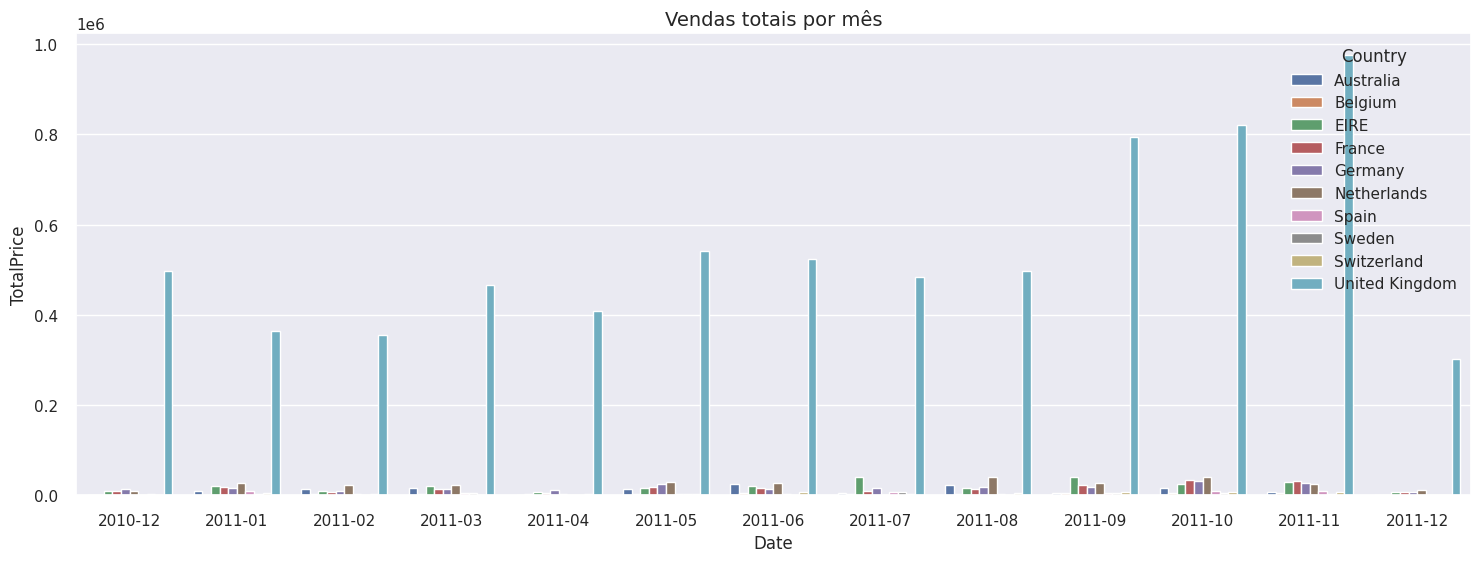

In [ ]:
# Valor de venda total por mês e por país (considere apenas os top 10) hue para caracterizar o país

sns.set(rc = {'figure.figsize':(18,6)})
sns.barplot(data = df_group_filter, x = 'Date', y = 'TotalPrice', estimator=sum, errorbar=None, hue='Country')

plt.title('Vendas totais por mês', loc='center', fontsize=14);
plt.show()


### Cálculo do RFM

Agrupe os dados por cliente e pedido/compra (InvoiceNo) e obtenha a
data e o preço total do pedido.
Com isso, agrupe novamente apenas por cliente e calcule o RFM, onde:
- R é a recência, diferença em dias da última compra do cliente e da última
compra disponível no conjunto de dados, que calcularam previamente.
- F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
- M é o ticket médio, ou seja, a média das compras feitas pelo cliente.

In [ ]:
# agrupar os dados por cliente e pedido/compra (InvoiceNo) e obter a data e o preço total do pedido
df_rfm = new_df.groupby(['CustomerID','InvoiceNo', 'InvoiceDate']).agg({'TotalPrice':'sum'}).reset_index();
df_rfm



,CustomerID,InvoiceNo,InvoiceDate,TotalPrice
0,12347,537626,2010-12-07,711.79
1,12347,542237,2011-01-26,475.39
2,12347,549222,2011-04-07,636.25
3,12347,556201,2011-06-09,382.52
4,12347,562032,2011-08-02,584.91
...,...,...,...,...
18524,18283,579673,2011-11-30,220.31
18525,18283,580872,2011-12-06,208.00
18526,18287,554065,2011-05-22,765.28
18527,18287,570715,2011-10-12,1001.32


In [ ]:
# ultimo dia de compra

last_date = df_r['InvoiceDate'].max()


In [ ]:
# calculo RFM

rec = df_rfm.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (last_date - x.max()).days, 'InvoiceNo':'count','TotalPrice': 'mean'})

rec = rec.rename(columns={'InvoiceDate':'Recência','InvoiceNo':'Frequência','TotalPrice':'TicketMédio'})

rec.sort_values(by='Frequência', ascending=False).reset_index();
rec

,Recência,Frequência,TicketMédio
CustomerID,,,
12347,2,7,615.714286
12348,75,4,449.310000
12349,18,1,1757.550000
12350,310,1,334.400000
12352,36,8,313.255000
...,...,...,...
18280,277,1,180.600000
18281,180,1,80.820000
18282,7,2,89.025000


Na tabela acima constam os dados de RFM para cada cliente, identificado com um ID na coluna 'CustomerID'.